#SHARON AKOTH OKECH

# Utilizing Machine Learning to Categorize COVID-19 Instances: A Review of Industrial Applications and Scholarly Research.

Introduction to Literature Survey.

The COVID-19 epidemic has boosted the output of research, particularly in machine learning (ML) for healthcare. This increase in scientific material spans multiple venues, from academic journals to white papers, expanding the discussion of ML's ability to navigate the pandemic. The survey's goal is to compile relevant papers that examine the use and impact of machine learning in detecting and managing COVID-19, highlighting both innovative research and long-standing questions about the integration of machine learning in healthcare.

Machine Learning for COVID-19 Classification and Healthcare

The use of machine learning in healthcare during the COVID-19 pandemic has been transformative, with ML models functioning as important tools for predicting infection rates and outcomes, driving public health strategy and resource allocation. The use of ML in epidemiology prior to the pandemic paved the way for its contemporary uses, underlining the importance of ethical data use and scalable healthcare solutions. This historical context helps us appreciate the promise and limitations of machine learning in current healthcare challenges.

Key factors influencing the ML classification of COVID-19 cases

The research warns against training ML models on limited or biased data sets, as this can lead to overfitting and a lack of generalizability. Feature selection emerges as an important factor in enhancing model accuracy, particularly when using indications that closely match the virus's clinical presentations. Addressing algorithmic bias is critical to preventing further healthcare disparities, necessitating demographic considerations in model training. The continuing evolution of SARS-CoV-2 demands frequent model modifications to preserve diagnostic accuracy. Furthermore, the actual deployment of ML depends on its seamless integration into clinical workflows, demanding models that are constructed with a deep understanding of the healthcare continuum and provider decision making process.

In [3]:
!pip uninstall jupyter
!pip install jupyter

In [4]:
%matplotlib inline
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [5]:
#From ths data i added three colums to my original dataset 
CovidData_df = pd.read_csv(r'Covid_Dataset.csv')
CovidData_df.head()


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03-05-2020,3,1,65,2,0,...,0,0,1,0,0,0,0,0,3,0
1,2,1,2,1,03-06-2020,3,1,72,3,0,...,0,0,1,0,0,1,1,0,5,0
2,2,1,2,2,09-06-2020,1,2,55,3,1,...,0,0,0,0,0,0,0,0,3,1
3,2,1,1,1,12-06-2020,3,2,53,2,0,...,0,0,0,0,0,0,0,0,7,0
4,2,1,2,1,21-06-2020,3,2,68,3,1,...,0,0,1,0,0,0,0,0,3,0


In [6]:
CovidData_df.dtypes

USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
DATE_DIED               object
INTUBED                  int64
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
ICU                      int64
dtype: object

In [7]:
CovidData_df.shape


(199999, 21)

In [8]:
CovidData_df.tail()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
199994,1,4,1,1,9999-99-99,3,2,27,2,0,...,0,0,0,0,0,0,0,0,6,0
199995,2,4,1,1,9999-99-99,3,2,42,2,0,...,0,0,0,0,0,0,0,0,6,0
199996,1,4,2,1,9999-99-99,3,2,57,3,0,...,0,0,0,0,0,0,0,1,6,0
199997,1,4,1,2,9999-99-99,2,2,45,2,0,...,0,0,0,0,0,0,0,0,6,1
199998,1,4,1,1,9999-99-99,3,2,54,2,0,...,0,0,0,0,0,1,0,0,6,0


In [9]:
#
# Define the 'death' function 
def death(date_died):
    if date_died == '9999-99-99':
        return 0
    else:
        return 1

# Apply the 'death' function to the 'DATE_DIED' column to create a new 'Death_Status' column
CovidData_df['Death_Status'] = CovidData_df['DATE_DIED'].map(death)
CovidData_df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Death_Status
0,2,1,1,1,03-05-2020,3,1,65,2,0,...,0,1,0,0,0,0,0,3,0,1
1,2,1,2,1,03-06-2020,3,1,72,3,0,...,0,1,0,0,1,1,0,5,0,1
2,2,1,2,2,09-06-2020,1,2,55,3,1,...,0,0,0,0,0,0,0,3,1,1
3,2,1,1,1,12-06-2020,3,2,53,2,0,...,0,0,0,0,0,0,0,7,0,1
4,2,1,2,1,21-06-2020,3,2,68,3,1,...,0,1,0,0,0,0,0,3,0,1


In [10]:
#change the format of the DATE_DIED to be uniform.
CovidData_df['DATE_DIED'].replace('9999-99-99','09-09-1999',inplace=True)
CovidData_df.tail()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Death_Status
199994,1,4,1,1,09-09-1999,3,2,27,2,0,...,0,0,0,0,0,0,0,6,0,0
199995,2,4,1,1,09-09-1999,3,2,42,2,0,...,0,0,0,0,0,0,0,6,0,0
199996,1,4,2,1,09-09-1999,3,2,57,3,0,...,0,0,0,0,0,0,1,6,0,0
199997,1,4,1,2,09-09-1999,2,2,45,2,0,...,0,0,0,0,0,0,0,6,1,0
199998,1,4,1,1,09-09-1999,3,2,54,2,0,...,0,0,0,0,1,0,0,6,0,0


In [11]:
#Change the DATE_DIED type to datetime.

CovidData_df['DATE_DIED'] = pd.to_datetime((CovidData_df['DATE_DIED']),format='%d-%m-%Y')
CovidData_df.dtypes

USMER                            int64
MEDICAL_UNIT                     int64
SEX                              int64
PATIENT_TYPE                     int64
DATE_DIED               datetime64[ns]
INTUBED                          int64
PNEUMONIA                        int64
AGE                              int64
PREGNANT                         int64
DIABETES                         int64
COPD                             int64
ASTHMA                           int64
INMSUPR                          int64
HIPERTENSION                     int64
OTHER_DISEASE                    int64
CARDIOVASCULAR                   int64
OBESITY                          int64
RENAL_CHRONIC                    int64
TOBACCO                          int64
CLASIFFICATION_FINAL             int64
ICU                              int64
Death_Status                     int64
dtype: object

In [12]:
CovidData_df.nunique() 
# to identify potentially redundant columns

USMER                     2
MEDICAL_UNIT              4
SEX                       2
PATIENT_TYPE              2
DATE_DIED               337
INTUBED                   4
PNEUMONIA                 3
AGE                     105
PREGNANT                  4
DIABETES                  2
COPD                      2
ASTHMA                    2
INMSUPR                   2
HIPERTENSION              2
OTHER_DISEASE             2
CARDIOVASCULAR            2
OBESITY                   2
RENAL_CHRONIC             2
TOBACCO                   2
CLASIFFICATION_FINAL      7
ICU                       2
Death_Status              2
dtype: int64

In [13]:
CovidData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   USMER                 199999 non-null  int64         
 1   MEDICAL_UNIT          199999 non-null  int64         
 2   SEX                   199999 non-null  int64         
 3   PATIENT_TYPE          199999 non-null  int64         
 4   DATE_DIED             199999 non-null  datetime64[ns]
 5   INTUBED               199999 non-null  int64         
 6   PNEUMONIA             199999 non-null  int64         
 7   AGE                   199999 non-null  int64         
 8   PREGNANT              199999 non-null  int64         
 9   DIABETES              199999 non-null  int64         
 10  COPD                  199999 non-null  int64         
 11  ASTHMA                199999 non-null  int64         
 12  INMSUPR               199999 non-null  int64         
 13 

In [14]:
CovidData_df. shape

(199999, 22)

In [15]:
CovidData_df['USMER'].value_counts()

2    112090
1     87909
Name: USMER, dtype: int64

In [16]:
CovidData_df['MEDICAL_UNIT'].value_counts()

4    180504
3     19175
2       169
1       151
Name: MEDICAL_UNIT, dtype: int64

In [17]:
CovidData_df['SEX'].value_counts()

2    104686
1     95313
Name: SEX, dtype: int64

In [18]:

CovidData_df['PATIENT_TYPE'].value_counts()

1    130682
2     69317
Name: PATIENT_TYPE, dtype: int64

In [19]:
CovidData_df['DATE_DIED'].value_counts()

1999-09-09    158592
2020-07-07       552
2020-06-16       541
2020-07-06       537
2020-07-13       536
               ...  
2020-10-20         1
2020-10-18         1
2020-10-16         1
2020-10-14         1
2020-10-12         1
Name: DATE_DIED, Length: 337, dtype: int64

In [20]:
CovidData_df['MEDICAL_UNIT'].value_counts()

4    180504
3     19175
2       169
1       151
Name: MEDICAL_UNIT, dtype: int64

In [21]:
CovidData_df['INTUBED'].value_counts()

3    130682
2     50665
1     17455
4      1197
Name: INTUBED, dtype: int64

In [22]:
CovidData_df['PNEUMONIA'].value_counts()

2     152930
1      42313
99      4756
Name: PNEUMONIA, dtype: int64

In [23]:
CovidData_df['PNEUMONIA'].mode()

0    2
Name: PNEUMONIA, dtype: int64

In [24]:
CovidData_df['DATE_DIED'].value_counts()

1999-09-09    158592
2020-07-07       552
2020-06-16       541
2020-07-06       537
2020-07-13       536
               ...  
2020-10-20         1
2020-10-18         1
2020-10-16         1
2020-10-14         1
2020-10-12         1
Name: DATE_DIED, Length: 337, dtype: int64

In [25]:
CovidData_df['PREGNANT'].value_counts()

3    104686
2     94004
1      1184
4       125
Name: PREGNANT, dtype: int64

In [26]:
CovidData_df['COPD'].value_counts()

0    195614
1      4385
Name: COPD, dtype: int64

In [27]:
CovidData_df['ASTHMA'].value_counts()

0    193626
1      6373
Name: ASTHMA, dtype: int64

In [28]:
CovidData_df['INMSUPR'].value_counts()

0    196240
1      3759
Name: INMSUPR, dtype: int64

In [29]:
CovidData_df['HIPERTENSION'].value_counts()

0    155045
1     44954
Name: HIPERTENSION, dtype: int64

In [30]:
CovidData_df['OTHER_DISEASE'].value_counts()

0    189531
1     10468
Name: OTHER_DISEASE, dtype: int64

In [31]:
CovidData_df['CARDIOVASCULAR'].value_counts()

0    194828
1      5171
Name: CARDIOVASCULAR, dtype: int64

In [32]:
CovidData_df['OBESITY'].value_counts()

0    164630
1     35369
Name: OBESITY, dtype: int64

In [33]:
CovidData_df['RENAL_CHRONIC'].value_counts()

0    193517
1      6482
Name: RENAL_CHRONIC, dtype: int64

In [34]:
CovidData_df['TOBACCO'].value_counts()

0    184786
1     15213
Name: TOBACCO, dtype: int64

In [35]:
CovidData_df['ICU'].value_counts()

0    130682
1     69317
Name: ICU, dtype: int64

In [36]:
CovidData_df['CLASIFFICATION_FINAL'].unique()

array([3, 5, 7, 6, 1, 2, 4])

Variable Description

Variables	Description of the Variable	Format/ data type
USMER	Sentinel surveillance is carried out through the system of respiratory disease monitoring health units (USMER). The USMER includes medical units of the first, second,  and third  level of care and the third  level units also participate as USMER, which due to their characteristics contribute to expanding the panorama of epidemiological information, among them those that have a specialty in pulmonology, infectious disease or pediatrics. . (Categories in Annex Catalog).	levels 1 to 3: from less serious cases to most serious cases at 3. 4 are missing values
MEDICAL_UNIT	"Identifies the entity where the medical unit that provided the care is located/ type of institution of the National Health System that provides the care.
"	levels 1 to 4: from less serious cases to most serious cases at 4
SEX	Sex of the patient	1 for female and 2 for male.
PATIENT_TYPE	Identifies if the patient has a diagnosis of COPD	Yes-1(COPD diagnosis), No-0 otherwise
DATE_DIED	Identifies the date the patient died.	If the patient died indicate the date of death, and 9999-99-99 otherwise
INTUBED	Showing the different levels of ventilator a patient is connected	levels 1 to 4: from less serious cases to most serious cases at 4
PNEUMONIA	Showing the patient has air sacs inflammation level in medical terms measure	1, 2 & 99
AGE	Identify the patient's age.	Numerical
PREGNANT	Identify if the patient is pregnant.	"      ●	Value 1: This value typically indicates that the patient is currently pregnant. It suggests that the patient is expecting a child at the time of their medical treatment.
●	Value 2: Value 2 could represent a situation where the patient is not pregnant. It may indicate that the patient is not currently pregnant and has no recent or past history of pregnancy.
●	Value 3: This value might be used to represent a situation where the patient's pregnancy status is unknown or not specified. This may be because it represents male data.
●	Value 4: It indicates that the values are missing."
DIABETES	Whether the patient has diabetes or not.	Yes-1(Has diabetes), No-0 otherwise
COPD	Indicates whether the patient has Chronic obstructive pulmonary disease or not	Yes-1(Has COPD), No-0 otherwise
ASTHMA	whether the patient has asthma or not.	Yes-1(Has asthma), No-0 otherwise
INMSUPR	whether the patient is immunosuppressed or not.	Yes-1(immunosuppressed), No-0 otherwise
HIPERTENSION	whether the patient has hypertension or not.	Yes-1(hypertension), No-0 otherwise
OTHER_DISEASE	whether the patient has other disease or not.	Yes-1(Has other disease ), No-0 otherwise
CARDIOVASCULAR	Identify if the patient has a diagnosis of cardiovascular diseases. 	Yes-1(Has the Disease), No-0 otherwise
OBESITY	Identify if the patient has a diagnosis of obesity.	Yes-1(Obese), No-0 (otherwise)
RENAL_CHRONIC	Identify if the patient has a diagnosis of chronic kidney failure.	Yes-1(Has chronic kidney failure), No-0 otherwise
TOBACCO	Identify if the patient has a smoking habit.	Yes-1(Has Smoking Habit), No-0 otherwise
CLASIFFICATION_FINAL	It’s the final classification	7 classes
ICU	Identify if the patient required admission to an Intensive Care Unit.	Yes(Required admission), No otherwise
Death_Status	Is the patient death or alive	1(alive) and 0(dead)

In [37]:
#check for null values
CovidData_df.isna().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
Death_Status            0
dtype: int64

In [38]:
#find missing values IN PREGNANT column
Missing_Values= CovidData_df[CovidData_df['PREGNANT'] == 4 ]
Missing_Values


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Death_Status
433,1,3,1,2,2020-04-29,2,1,62,4,0,...,0,1,0,0,0,0,0,5,1,1
1882,2,3,1,1,1999-09-09,3,2,20,4,0,...,0,0,0,0,0,0,0,1,0,0
5011,2,3,1,1,1999-09-09,3,2,55,4,1,...,0,1,0,0,0,0,0,3,0,0
5466,1,3,1,1,1999-09-09,3,2,32,4,0,...,0,0,0,0,1,0,0,3,0,0
7980,2,3,1,1,1999-09-09,3,2,30,4,0,...,0,0,0,0,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196048,2,4,1,1,1999-09-09,3,2,49,4,0,...,0,0,1,0,0,0,0,6,0,0
196753,2,4,1,1,1999-09-09,3,1,36,4,0,...,0,0,0,0,0,0,0,6,0,0
197460,2,4,1,1,1999-09-09,3,2,34,4,0,...,0,0,0,0,0,0,0,6,0,0
197584,2,4,1,1,1999-09-09,3,2,33,4,0,...,0,0,0,0,1,0,0,6,0,0


In [39]:

CovidData_df['PREGNANT'] = CovidData_df['PREGNANT'].fillna(CovidData_df['PREGNANT'].mode()) 

In [40]:
#Fillin missing values
CovidData_df['PREGNANT'].replace(4,CovidData_df['PREGNANT'].mode,inplace=True)
CovidData_df
#there are 125 missing values  that i'll replace with the mode.


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Death_Status
0,2,1,1,1,2020-05-03,3,1,65,2,0,...,0,1,0,0,0,0,0,3,0,1
1,2,1,2,1,2020-06-03,3,1,72,3,0,...,0,1,0,0,1,1,0,5,0,1
2,2,1,2,2,2020-06-09,1,2,55,3,1,...,0,0,0,0,0,0,0,3,1,1
3,2,1,1,1,2020-06-12,3,2,53,2,0,...,0,0,0,0,0,0,0,7,0,1
4,2,1,2,1,2020-06-21,3,2,68,3,1,...,0,1,0,0,0,0,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,1,4,1,1,1999-09-09,3,2,27,2,0,...,0,0,0,0,0,0,0,6,0,0
199995,2,4,1,1,1999-09-09,3,2,42,2,0,...,0,0,0,0,0,0,0,6,0,0
199996,1,4,2,1,1999-09-09,3,2,57,3,0,...,0,0,0,0,0,0,1,6,0,0
199997,1,4,1,2,1999-09-09,2,2,45,2,0,...,0,0,0,0,0,0,0,6,1,0


In [41]:
CovidData_df.dtypes

USMER                            int64
MEDICAL_UNIT                     int64
SEX                              int64
PATIENT_TYPE                     int64
DATE_DIED               datetime64[ns]
INTUBED                          int64
PNEUMONIA                        int64
AGE                              int64
PREGNANT                        object
DIABETES                         int64
COPD                             int64
ASTHMA                           int64
INMSUPR                          int64
HIPERTENSION                     int64
OTHER_DISEASE                    int64
CARDIOVASCULAR                   int64
OBESITY                          int64
RENAL_CHRONIC                    int64
TOBACCO                          int64
CLASIFFICATION_FINAL             int64
ICU                              int64
Death_Status                     int64
dtype: object

In [42]:
CovidData_df.dtypes

USMER                            int64
MEDICAL_UNIT                     int64
SEX                              int64
PATIENT_TYPE                     int64
DATE_DIED               datetime64[ns]
INTUBED                          int64
PNEUMONIA                        int64
AGE                              int64
PREGNANT                        object
DIABETES                         int64
COPD                             int64
ASTHMA                           int64
INMSUPR                          int64
HIPERTENSION                     int64
OTHER_DISEASE                    int64
CARDIOVASCULAR                   int64
OBESITY                          int64
RENAL_CHRONIC                    int64
TOBACCO                          int64
CLASIFFICATION_FINAL             int64
ICU                              int64
Death_Status                     int64
dtype: object

In [43]:
#find missing values IN USMER column
Missing_Values_USMER= CovidData_df[CovidData_df['USMER'] == 4]
Missing_Values_USMER
#no missing values represented by 4

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Death_Status


CovidDataAlto_df =pd.read_csv(r'COVID19MEXICO.csv')
CovidDataAlt_df.head()

CovidDataAlt_df.info()

CovidDataAlt_df['FECHA_ACTUALIZACION'].unique()

CovidDataAlt_df['FECHA_ACTUALIZACION'].max()

CovidDataAlt_df['FECHA_ACTUALIZACION'].min()

AltColumns_df=CovidDataAlt_df[['SECTOR', 'MUNICIPIO_RES','PAIS_ORIGEN','OTRO_CASO']].copy()
AltColumns_df=AltColumns_df.set_axis(['Sector','Municipal_of_Residence','Place_of_Origin','Contact_wOtherCases'],axis=1)
AltColumns_df

AltColumns_df.shape

AltColumns_df['Contact_wOtherCases'].unique()

AltColumns_df['Place_of_Origin'].unique()

AltColumns_df.

### Data Exploration

In [44]:
CovidData_df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Death_Status
0,2,1,1,1,2020-05-03,3,1,65,2,0,...,0,1,0,0,0,0,0,3,0,1
1,2,1,2,1,2020-06-03,3,1,72,3,0,...,0,1,0,0,1,1,0,5,0,1
2,2,1,2,2,2020-06-09,1,2,55,3,1,...,0,0,0,0,0,0,0,3,1,1
3,2,1,1,1,2020-06-12,3,2,53,2,0,...,0,0,0,0,0,0,0,7,0,1
4,2,1,2,1,2020-06-21,3,2,68,3,1,...,0,1,0,0,0,0,0,3,0,1


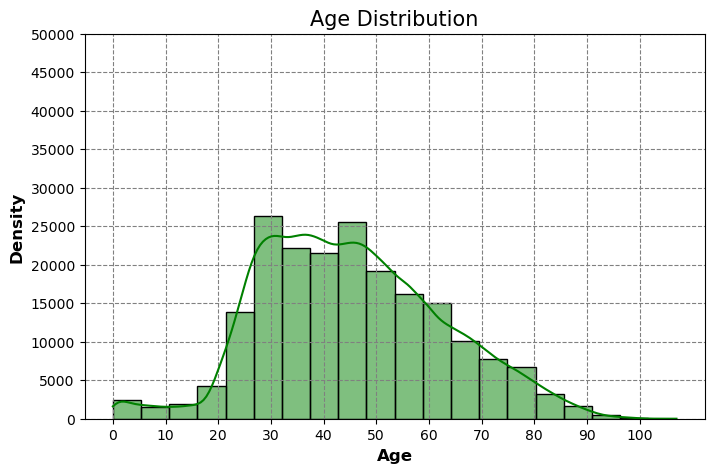

In [45]:


# Assuming 'CovidData_df' is your DataFrame and 'AGE' is the column of interest.
plt.figure(figsize=(8, 5))
sns.histplot(CovidData_df['AGE'], kde=True, color='g', bins=20)

# Setting the x-axis scale. For example, from 0 to 100 with a step of 10.
plt.xticks(range(0, 101, 10))

# Setting the y-axis scale. For example, from 0 to 50000 with a step of 5000.
plt.yticks(range(0, 50001, 5000))

plt.xlabel('Age', fontsize=12, fontweight='bold')
plt.ylabel('Density', fontsize=12, fontweight='bold')
plt.title("Age Distribution", fontsize=15)
plt.grid(ls='--', color='grey')
plt.show()
# the distribution assumes a normal gausian distribution.

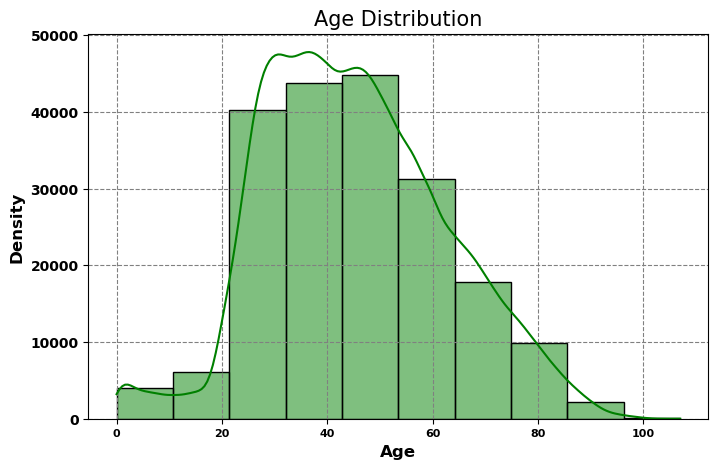

In [46]:
#CovidData_df['AGE'].value_counts()
plt.figure(figsize=(8, 5))
# sns.distplot(df['Age'], kde=True, color='g')
sns.histplot(CovidData_df['AGE'], kde=True, color='g', bins=10)
plt.xlabel('Age', fontsize=12, fontweight='bold')
plt.ylabel('Density', fontsize=12, fontweight='bold')
plt.xticks(fontsize=8, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.grid(ls='--', color='grey')
plt.title("Age Distribution", fontsize=15)
plt.show()


In [47]:
print('mean is:',CovidData_df['AGE'].mean())
print('median is:', CovidData_df['AGE'].median())
print('mode is:', CovidData_df['AGE'].mode())
print('maximum is:', CovidData_df['AGE'].max())
print('minimum is:', CovidData_df['AGE'].min())

mean is: 45.31700158500792
median is: 44.0
mode is: 0    37
Name: AGE, dtype: int64
maximum is: 107
minimum is: 0


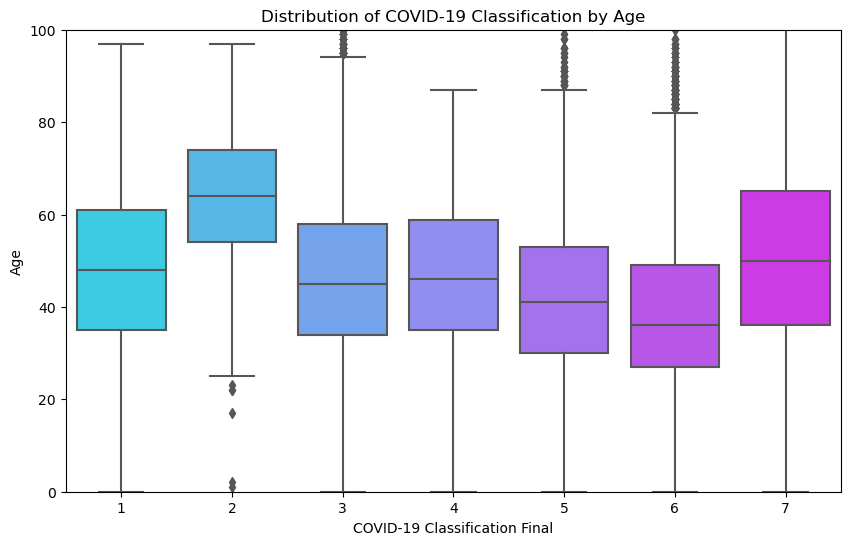

In [48]:
plt.figure(figsize=(10, 6))

# Plot the count plot
#sns.countplot(x='CLASIFFICATION_FINAL', data=CovidData_df, palette='viridis', alpha=0.7)

# Overlay with the box plot
sns.boxplot(x='CLASIFFICATION_FINAL', y='AGE', data=CovidData_df, palette='cool')

# Adjust the y-axis to better fit the age data
plt.ylim(0, 100)  # Replace 0 and 100 with the minimum and maximum ages in your dataset as appropriate

plt.title('Distribution of COVID-19 Classification by Age')
plt.xlabel('COVID-19 Classification Final')
plt.ylabel('Age')

plt.show()

Text(0, 0.5, 'Numeric Age')

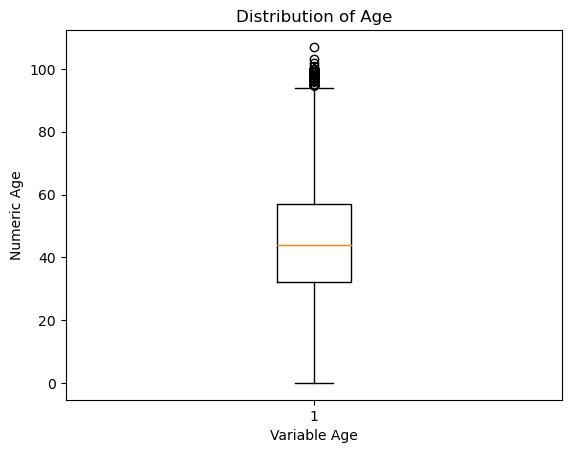

In [49]:
plt.boxplot(CovidData_df['AGE'])
plt.title('Distribution of Age')
plt.xlabel('Variable Age')
plt.ylabel('Numeric Age')

In [50]:
CovidData_df['AGE'].max()

107

In [51]:

# Calculate the Interquartile Range (IQR)
Q1 = CovidData_df['AGE'].quantile(0.25)
Q3 = CovidData_df['AGE'].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers using IQR
outliers =CovidData_df[(CovidData_df['AGE'] < (Q1 - 1.5 * IQR)) | (CovidData_df['AGE'] > (Q3 + 1.5 * IQR))]

# Print the outliers
#print(outliers)
outliers['AGE']
#The outliers are normal within the possible ages therefore its okay to leave them for analysis.

283       95
1103      97
1202      97
1241      97
1376      95
          ..
184460    97
191926    98
192208    95
196815    96
198955    95
Name: AGE, Length: 200, dtype: int64

Text(0.5, 0, 'SEX(1-Female, 2-Male)')

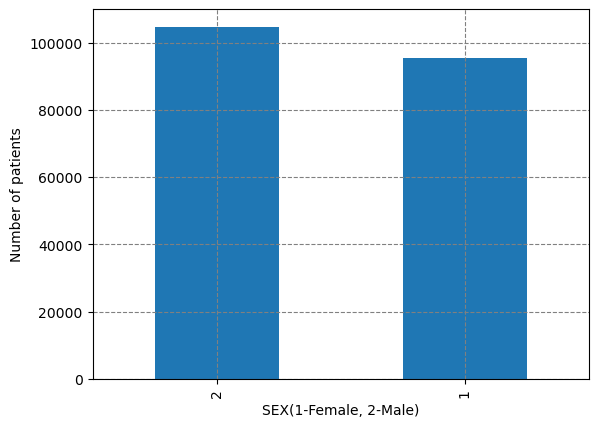

In [52]:
#Plot of Count of males and females
CovidData_df['SEX'].value_counts().plot(kind='bar')
plt.ylabel('Number of patients')
plt.grid(ls='--', color='grey')
plt.xlabel('SEX(1-Female, 2-Male)')

In [53]:
CovidData_df.dtypes

USMER                            int64
MEDICAL_UNIT                     int64
SEX                              int64
PATIENT_TYPE                     int64
DATE_DIED               datetime64[ns]
INTUBED                          int64
PNEUMONIA                        int64
AGE                              int64
PREGNANT                        object
DIABETES                         int64
COPD                             int64
ASTHMA                           int64
INMSUPR                          int64
HIPERTENSION                     int64
OTHER_DISEASE                    int64
CARDIOVASCULAR                   int64
OBESITY                          int64
RENAL_CHRONIC                    int64
TOBACCO                          int64
CLASIFFICATION_FINAL             int64
ICU                              int64
Death_Status                     int64
dtype: object

In [54]:
# Ensure all values are actually numeric; this step also converts strings that represent numbers
CovidData_df['PREGNANT'] = pd.to_numeric(CovidData_df['PREGNANT'], errors='coerce')

Text(0.5, 0, 'MEDICAL UNIT')

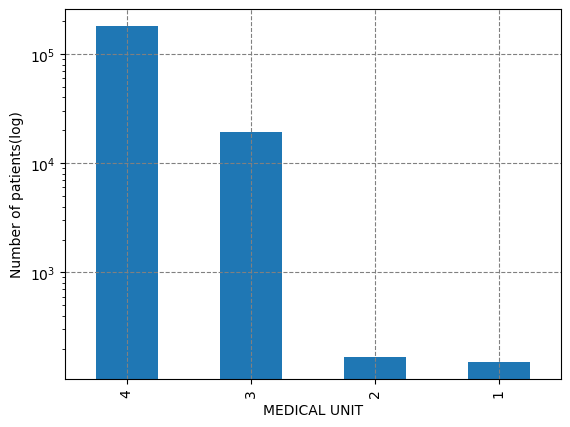

In [55]:
CovidData_df['MEDICAL_UNIT'].value_counts().plot(kind='bar')
plt.ylabel('Number of patients(log)')
plt.yscale('log')
plt.grid(ls='--', color='grey')
plt.xlabel('MEDICAL UNIT')

Text(0.5, 0, 'USMER')

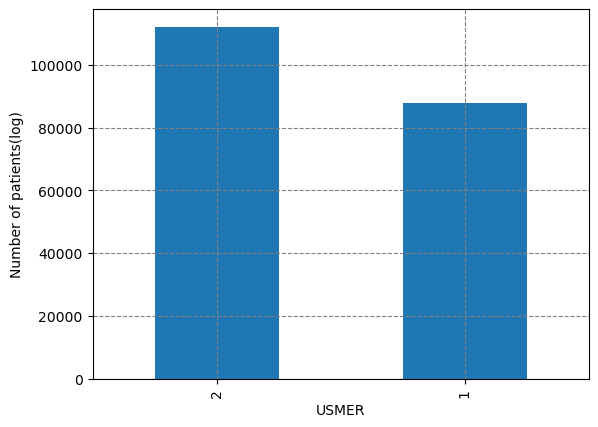

In [56]:
CovidData_df['USMER'].value_counts().plot(kind='bar')
plt.ylabel('Number of patients(log)')
#plt.yscale('log')
plt.grid(ls='--', color='grey')
plt.xlabel('USMER')

In [57]:
CovidData_df.dtypes

USMER                            int64
MEDICAL_UNIT                     int64
SEX                              int64
PATIENT_TYPE                     int64
DATE_DIED               datetime64[ns]
INTUBED                          int64
PNEUMONIA                        int64
AGE                              int64
PREGNANT                       float64
DIABETES                         int64
COPD                             int64
ASTHMA                           int64
INMSUPR                          int64
HIPERTENSION                     int64
OTHER_DISEASE                    int64
CARDIOVASCULAR                   int64
OBESITY                          int64
RENAL_CHRONIC                    int64
TOBACCO                          int64
CLASIFFICATION_FINAL             int64
ICU                              int64
Death_Status                     int64
dtype: object

In [58]:

CovidDatacat_df=CovidData_df
CovidData_df['AGE']=CovidData_df['AGE'].astype(int)
CovidData_df['AGE']

0         65
1         72
2         55
3         53
4         68
          ..
199994    27
199995    42
199996    57
199997    45
199998    54
Name: AGE, Length: 199999, dtype: int64

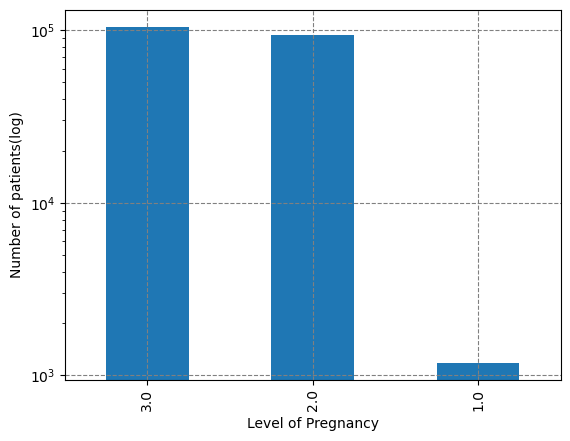

In [59]:
CovidData_df['PREGNANT'].value_counts().plot(kind='bar')
plt.xlabel('Level of Pregnancy')
plt.ylabel('Number of patients(log)')
plt.yscale('log')
plt.grid(ls='--', color='grey')


In [60]:
# Filter the DataFrame for rows where 'PREGNANT' is 3 and 'SEX' is 'male'
Unspecified_Male = CovidDatacat_df[(CovidDatacat_df['PREGNANT'] == '3') & (CovidDatacat_df['SEX'] == '2')]
Unspecified_Male
# None of the unknown pregnancies represnted by 3 are because of males

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Death_Status


In [61]:
pd.crosstab(CovidDatacat_df['SEX'],CovidDatacat_df['Death_Status'])
#0-Alive, 1-Dead

Death_Status,0,1
SEX,,
1,80030,15283
2,78562,26124


In [62]:
#Dead/( Alive+Dead)×100
Female_Deaths=80030/(15283+80030)*100
Male_Deaths=78562/(26124+78562)*100
print(f'female_death_percentage: {Female_Deaths:.2f}%',f'male_death_percentage: {Male_Deaths:.2f}%')

female_death_percentage: 83.97% male_death_percentage: 75.05%


In [63]:
pd.crosstab(CovidDatacat_df['SEX'],CovidDatacat_df['CLASIFFICATION_FINAL'])

CLASIFFICATION_FINAL,1,2,3,4,5,6,7
SEX,,,,,,,
1,166,449,62269,91,3289,21285,7764
2,189,800,71459,103,3163,20727,8245


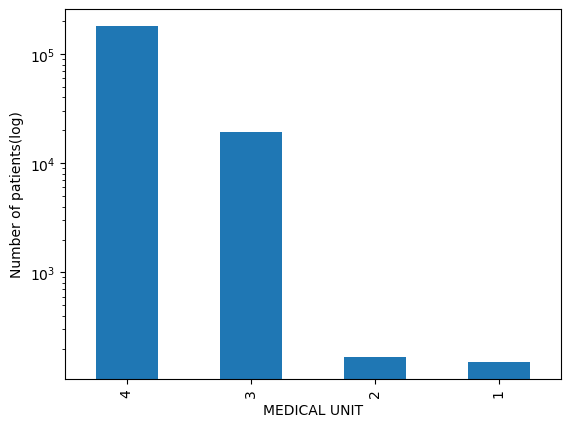

In [64]:
CovidData_df['MEDICAL_UNIT'].value_counts().plot(kind='bar')
plt.ylabel('Number of patients(log)')
plt.xlabel('MEDICAL UNIT')
plt.yscale('log')  # Use a logarithmic scale for the y-axis
#plt.ylim(0, 50000)  # Set the upper limit of the y-axis to a smaller value
#Most patients are in unit 4

In [65]:
CovidnumPerMedUnit=pd.crosstab(CovidData_df['MEDICAL_UNIT'],CovidData_df['CLASIFFICATION_FINAL'])
CovidnumPerMedUnit

CLASIFFICATION_FINAL,1,2,3,4,5,6,7
MEDICAL_UNIT,,,,,,,
1,0,0,40,0,5,2,104
2,0,0,12,0,2,17,138
3,112,24,8495,193,658,1347,8346
4,243,1225,125181,1,5787,40646,7421


<Figure size 1200x800 with 0 Axes>

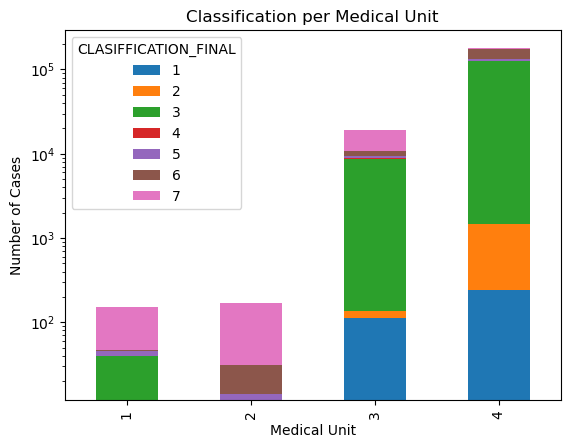

In [66]:

# Classification for every Medical Unit
plt.figure(figsize=(12, 8)) 
CovidnumPerMedUnit.plot(kind='bar', stacked=True)
plt.title('Classification per Medical Unit')
plt.xlabel('Medical Unit')
plt.ylabel('Number of Cases')
plt.yscale('log')
plt.show()

Text(0.5, 0, 'SEX(1-Female, 2-Male)')

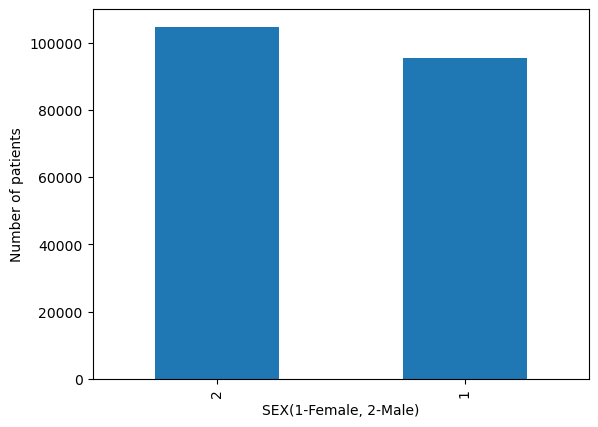

In [67]:
CovidData_df['SEX'].value_counts().plot(kind='bar')
plt.ylabel('Number of patients')
plt.xlabel('SEX(1-Female, 2-Male)')

In [68]:
Death_Dates=pd.crosstab(CovidData_df['DATE_DIED'],CovidData_df['Death_Status'])
Death_Dates

Death_Status,0,1
DATE_DIED,,
1999-09-09,158592,0
2020-01-02,0,1
2020-01-03,0,3
2020-01-04,0,1
2020-01-05,0,1
...,...,...
2021-04-28,0,22
2021-04-29,0,15
2021-04-30,0,12


In [69]:
filtered_df = Death_Dates[Death_Dates.index != '1999-09-09']
filtered_df

Death_Status,0,1
DATE_DIED,,
2020-01-02,0,1
2020-01-03,0,3
2020-01-04,0,1
2020-01-05,0,1
2020-01-06,0,1
...,...,...
2021-04-28,0,22
2021-04-29,0,15
2021-04-30,0,12


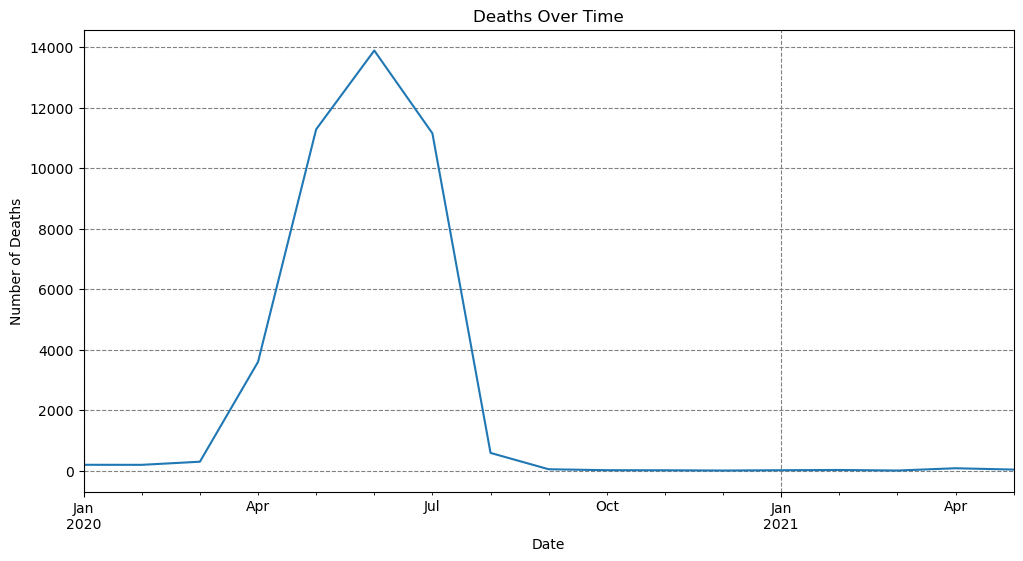

In [70]:
death_counts = filtered_df[1]  #'1' indicates death
# Sum up the death counts for each month
monthly_death_counts = filtered_df[1].resample('M').sum()  # 'M' stands for month end frequency
plt.figure(figsize=(12, 6))
monthly_death_counts.plot(kind='line')
plt.title('Deaths Over Time')
plt.grid(ls='--', color='grey')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.show()
#hIGH

In [71]:
Pneumonia_DeathStatus=pd.crosstab(CovidData_df['PNEUMONIA'],CovidData_df['Death_Status'])
Pneumonia_DeathStatus

Death_Status,0,1
PNEUMONIA,,
1,18202,24111
2,135995,16935
99,4395,361


<Figure size 1200x800 with 0 Axes>

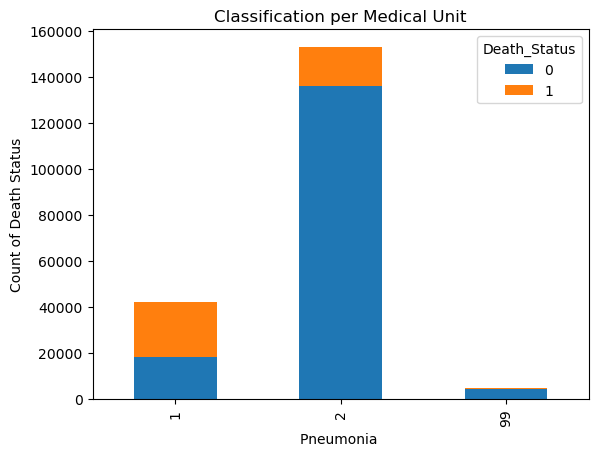

In [72]:
# Death stats vs pneamonia symptoms
plt.figure(figsize=(12, 8)) 
Pneumonia_DeathStatus.plot(kind='bar', stacked=True)
plt.title('Classification per Medical Unit')
plt.xlabel('Pneumonia ')
plt.ylabel('Count of Death Status')
#plt.yscale('log')
plt.show()
#0-alive, 1-dead

In [73]:
INMSUPR=pd.crosstab(CovidData_df['INMSUPR'],CovidData_df['Death_Status'])
INMSUPR

Death_Status,0,1
INMSUPR,,
0,156547,39693
1,2045,1714


In [74]:
#Probability that an immunosuppressed individual will die
print('Probability that an immunosuppressed individual will die',1714/(2045+1714)*100)
print('Probability that a normal individual will die', 39693/(156547+39693)*100)
#the probability of an immunosuppressed dying is twice as muh as a normal individual.

Probability that an immunosuppressed individual will die 45.59723330673051
Probability that a normal individual will die 20.226763147166736


In [75]:
CovidData_df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Death_Status
0,2,1,1,1,2020-05-03,3,1,65,2.0,0,...,0,1,0,0,0,0,0,3,0,1
1,2,1,2,1,2020-06-03,3,1,72,3.0,0,...,0,1,0,0,1,1,0,5,0,1
2,2,1,2,2,2020-06-09,1,2,55,3.0,1,...,0,0,0,0,0,0,0,3,1,1
3,2,1,1,1,2020-06-12,3,2,53,2.0,0,...,0,0,0,0,0,0,0,7,0,1
4,2,1,2,1,2020-06-21,3,2,68,3.0,1,...,0,1,0,0,0,0,0,3,0,1


In [76]:
PATIENT_TYPE=pd.crosstab(CovidData_df['PATIENT_TYPE'],CovidData_df['Death_Status'])
PATIENT_TYPE
#1-outpatient, 2-inpatient

Death_Status,0,1
PATIENT_TYPE,,
1,127337,3345
2,31255,38062


In [77]:
INTUBED=pd.crosstab(CovidData_df['INTUBED'],CovidData_df['Death_Status'])
INTUBED

Death_Status,0,1
INTUBED,,
1,1977,15478
2,28973,21692
3,127337,3345
4,305,892


In [78]:
HIPERTENSION=pd.crosstab(CovidData_df['HIPERTENSION'],CovidData_df['Death_Status'])
HIPERTENSION

Death_Status,0,1
HIPERTENSION,,
0,132103,22942
1,26489,18465


In [79]:
print('Probality that a patient with hypertension dies is:',18465/(26489+18465)*100)

Probality that a patient with hypertension dies is: 41.07532143969391


In [80]:
DIABETES=pd.crosstab(CovidData_df['DIABETES'],CovidData_df['Death_Status'])
DIABETES

Death_Status,0,1
DIABETES,,
0,139363,26043
1,19229,15364


In [81]:
TOBACCO = pd.crosstab(CovidData_df['TOBACCO'],CovidData_df['Death_Status'])
TOBACCO

Death_Status,0,1
TOBACCO,,
0,147016,37770
1,11576,3637


In [82]:
print('Probality that a tobacco user dies is:',3637/(11576+3637)*100)
print('Probability of finding a former tobacco user among the dead is:',3637/(3637
+37770)*100)

Probality that a tobacco user dies is: 23.90718464471176
Probability of finding a former tobacco user among the dead is: 8.783539015142368


In [83]:
OTHER_DISEASE=pd.crosstab(CovidData_df['OTHER_DISEASE'],CovidData_df['Death_Status'])
OTHER_DISEASE

Death_Status,0,1
OTHER_DISEASE,,
0,151500,38031
1,7092,3376


In [84]:
CARDIOVASCULAR=pd.crosstab(CovidData_df['CARDIOVASCULAR'],CovidData_df['Death_Status'])
CARDIOVASCULAR

Death_Status,0,1
CARDIOVASCULAR,,
0,155947,38881
1,2645,2526


In [85]:
print('Probality that a person with Cardiovascular disease dies is:',2526
/(2645+2526)*100)

Probality that a person with Cardiovascular disease dies is: 48.849352156256046


In [86]:
RENAL_CHRONIC=pd.crosstab(CovidData_df['RENAL_CHRONIC'],CovidData_df['Death_Status'])
RENAL_CHRONIC


Death_Status,0,1
RENAL_CHRONIC,,
0,155940,37577
1,2652,3830


In [87]:
print('Probality that a person with RENAL_CHRONIC disease dies is:',3830/(3830+2652)*100)

Probality that a person with RENAL_CHRONIC disease dies is: 59.08670163529774


In [88]:
ICU=pd.crosstab(CovidData_df['ICU'],CovidData_df['Death_Status'])
ICU

Death_Status,0,1
ICU,,
0,127337,3345
1,31255,38062


In [89]:
print('Probality that a person in ICU dies is:',38062/(38062+31255)*100)

Probality that a person in ICU dies is: 54.9100509254584


Text(0.5, 0, 'Death Status(1-Death, 0-Alive)')

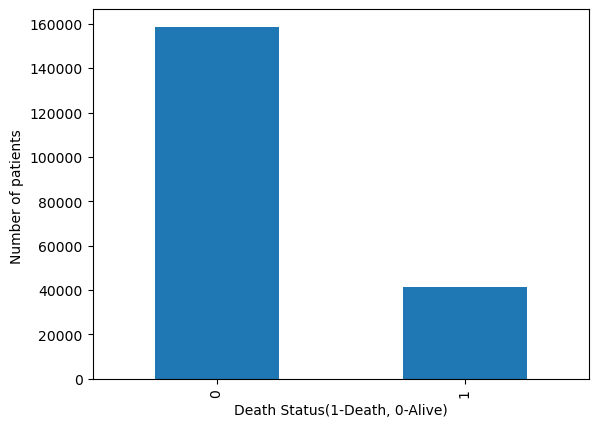

In [90]:
CovidData_df['Death_Status'].value_counts().plot(kind='bar')
plt.ylabel('Number of patients ')
plt.xlabel('Death Status(1-Death, 0-Alive)')

In [91]:
CovidData_df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Death_Status
0,2,1,1,1,2020-05-03,3,1,65,2.0,0,...,0,1,0,0,0,0,0,3,0,1
1,2,1,2,1,2020-06-03,3,1,72,3.0,0,...,0,1,0,0,1,1,0,5,0,1
2,2,1,2,2,2020-06-09,1,2,55,3.0,1,...,0,0,0,0,0,0,0,3,1,1
3,2,1,1,1,2020-06-12,3,2,53,2.0,0,...,0,0,0,0,0,0,0,7,0,1
4,2,1,2,1,2020-06-21,3,2,68,3.0,1,...,0,1,0,0,0,0,0,3,0,1


In [92]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#from statsmodels.tools.tools import add_constant
# Adding a constant column for intercept
#VIF_lst=x.drop(['AGE'], axis=1)
#X = add_constant(VIF_lst)

# Calculating VIF for each feature
#vif_data = pd.DataFrame({
#    'Feature': X.columns,
#    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#})

#print(vif_data)

### Data Preprocessing

In [93]:
CovidData_df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Death_Status
0,2,1,1,1,2020-05-03,3,1,65,2.0,0,...,0,1,0,0,0,0,0,3,0,1
1,2,1,2,1,2020-06-03,3,1,72,3.0,0,...,0,1,0,0,1,1,0,5,0,1
2,2,1,2,2,2020-06-09,1,2,55,3.0,1,...,0,0,0,0,0,0,0,3,1,1
3,2,1,1,1,2020-06-12,3,2,53,2.0,0,...,0,0,0,0,0,0,0,7,0,1
4,2,1,2,1,2020-06-21,3,2,68,3.0,1,...,0,1,0,0,0,0,0,3,0,1


In [94]:
# Columns to be one-hot encoded
columns_to_encode = ['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'PREGNANT']

# Apply pd.get_dummies to each column and create a new DataFrame
encoded_df = pd.get_dummies(CovidData_df, columns=columns_to_encode, prefix=columns_to_encode)
encoded_df

,DATE_DIED,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,...,INTUBED_1,INTUBED_2,INTUBED_3,INTUBED_4,PNEUMONIA_1,PNEUMONIA_2,PNEUMONIA_99,PREGNANT_1.0,PREGNANT_2.0,PREGNANT_3.0
0,2020-05-03,65,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,2020-06-03,72,0,0,0,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1
2,2020-06-09,55,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
3,2020-06-12,53,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,2020-06-21,68,1,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,1999-09-09,27,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
199995,1999-09-09,42,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
199996,1999-09-09,57,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
199997,1999-09-09,45,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [148]:
encoded_df.dtypes

DATE_DIED               datetime64[ns]
AGE                              int64
DIABETES                         int64
COPD                             int64
ASTHMA                           int64
INMSUPR                          int64
HIPERTENSION                     int64
OTHER_DISEASE                    int64
CARDIOVASCULAR                   int64
OBESITY                          int64
RENAL_CHRONIC                    int64
TOBACCO                          int64
CLASIFFICATION_FINAL             int64
ICU                              int64
Death_Status                     int64
USMER_1                          uint8
USMER_2                          uint8
MEDICAL_UNIT_1                   uint8
MEDICAL_UNIT_2                   uint8
MEDICAL_UNIT_3                   uint8
MEDICAL_UNIT_4                   uint8
SEX_1                            uint8
SEX_2                            uint8
PATIENT_TYPE_1                   uint8
PATIENT_TYPE_2                   uint8
INTUBED_1                

In [149]:
#Columns to drop-'DATE_DIED',   
#columns_to_drop= ['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE','DATE_DIED', 'INTUBED', 'PNEUMONIA', 'PREGNANT']
#CovidData_df_dropped = CovidData_df.drop(columns=columns_to_drop)

#CovidData_df_dropped
droplst=['CLASIFFICATION_FINAL','DATE_DIED']
encodedf_df=encoded_df.drop(columns=droplst, axis=1)
encodedf_df.head()

,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,...,INTUBED_1,INTUBED_2,INTUBED_3,INTUBED_4,PNEUMONIA_1,PNEUMONIA_2,PNEUMONIA_99,PREGNANT_1.0,PREGNANT_2.0,PREGNANT_3.0
0,65,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,72,0,0,0,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,1
2,55,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
3,53,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,68,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [97]:
encodedf_df.isnull().values.any()

False

In [98]:
#normalized 
from sklearn.preprocessing import MinMaxScaler
# Initialize the MinMaxScaler.
scaler = MinMaxScaler()

# Fit the scaler to the 'AGE' column and transform it (reshaping is necessary as it expects 2D array)
encodedf_df['AGE'] = scaler.fit_transform(encodedf_df[['AGE']])

# Show the first 5 rows of the DataFrame to check the normalized 'AGE' column
print(encodedf_df.head())

        AGE  DIABETES  COPD  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0  0.607477         0     0       0        0             1              0   
1  0.672897         0     0       0        0             1              0   
2  0.514019         1     0       0        0             0              0   
3  0.495327         0     0       0        0             0              0   
4  0.635514         1     0       0        0             1              0   

   CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  ...  INTUBED_1  INTUBED_2  \
0               0        0              0  ...          0          0   
1               0        1              1  ...          0          0   
2               0        0              0  ...          1          0   
3               0        0              0  ...          0          0   
4               0        0              0  ...          0          0   

   INTUBED_3  INTUBED_4  PNEUMONIA_1  PNEUMONIA_2  PNEUMONIA_99  PREGNANT_1.0  \
0          1          0

In [99]:

x = encodedf_df
x

,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,...,INTUBED_1,INTUBED_2,INTUBED_3,INTUBED_4,PNEUMONIA_1,PNEUMONIA_2,PNEUMONIA_99,PREGNANT_1.0,PREGNANT_2.0,PREGNANT_3.0
0,0.607477,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,0.672897,0,0,0,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,1
2,0.514019,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
3,0.495327,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,0.635514,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,0.252336,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
199995,0.392523,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
199996,0.532710,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
199997,0.420561,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [100]:
y = CovidData_df.CLASIFFICATION_FINAL.copy()
y

0         3
1         5
2         3
3         7
4         3
         ..
199994    6
199995    6
199996    6
199997    6
199998    6
Name: CLASIFFICATION_FINAL, Length: 199999, dtype: int64

In [101]:
y.isnull().values.any()


False

In [102]:

y=y.values

In [103]:
from sklearn.model_selection import train_test_split
# 70 % go into the training test, 30% in the validation test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [105]:
!pip install xgboost

In [106]:
model_log = LogisticRegression(max_iter=1000)
model_ran=RandomForestClassifier()
model_gb=GradientBoostingClassifier()
model_dt=DecisionTreeClassifier()
model_xgb=xgb.XGBClassifier()


In [107]:
model_log.fit(x_train, y_train) # training

model_ran.fit(x_train, y_train)

model_gb.fit(x_train, y_train)

model_dt.fit(x_train, y_train)

y_train = y_train - 1  # This will shift your classes from [1 2 3 4 5 6 7] to [0 1 2 3 4 5 6]

# Then you can fit the model again
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [108]:
y_pred_log = model_log.predict(x_test)
y_pred_ran=model_ran.predict(x_test)
y_pred_gb=model_gb.predict(x_test)
y_pred_dt=model_dt.predict(x_test)
y_pred_xgb=model_xgb.predict(x_test)

In [109]:
from sklearn.metrics import  accuracy_score

In [110]:
accuracy_log = accuracy_score(y_test, y_pred_log) *100

In [112]:
print('Logistic accuracy: ',accuracy_score(y_test, y_pred_log) *100 )
print('Decision Tree accuracy: ',accuracy_score(y_test, y_pred_dt) *100 )
print('Random Forest accuracy: ',accuracy_score(y_test, y_pred_ran) *100 )
print('Gradient Boosting accuracy: ',accuracy_score(y_test, y_pred_gb) *100 )
print('XGBoost accuracy: ',accuracy_score(y_test, y_pred_xgb) *100 )

Logistic accuracy:  69.35333333333334
Decision Tree accuracy:  66.95833333333333
Random Forest accuracy:  67.59166666666667
Gradient Boosting accuracy:  70.97166666666666
XGBoost accuracy:  1.335


# Evaluate the Model

In [113]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [114]:
matrix = confusion_matrix(y_test,y_pred_gb)
matrix

array([[    0,     0,    84,     0,     0,     1,    22],
       [    0,     0,   366,     0,     0,     0,     9],
       [    0,     0, 37748,     0,     0,   732,  1518],
       [    0,     0,    36,     0,     0,     0,    21],
       [    1,     0,  1717,     0,    56,   136,   143],
       [    0,     0,  9889,     0,    21,  2460,   311],
       [    1,     0,  2391,     0,     1,    17,  2319]])

In [115]:

print(f"Classification Report:\n{classification_report(y_test, y_pred_gb)}")

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       107
           2       0.00      0.00      0.00       375
           3       0.72      0.94      0.82     39998
           4       0.00      0.00      0.00        57
           5       0.72      0.03      0.05      2053
           6       0.74      0.19      0.31     12681
           7       0.53      0.49      0.51      4729

    accuracy                           0.71     60000
   macro avg       0.39      0.24      0.24     60000
weighted avg       0.70      0.71      0.65     60000



/Users/sharonokech/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sharonokech/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sharonokech/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [140]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance
import shap
import pandas as pd
import numpy as np

#### Repeat the process leaving out the ['AGE'] column

In [118]:
X=encoded_df.drop(['AGE','DATE_DIED'], axis=1)
X

,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,...,INTUBED_1,INTUBED_2,INTUBED_3,INTUBED_4,PNEUMONIA_1,PNEUMONIA_2,PNEUMONIA_99,PREGNANT_1.0,PREGNANT_2.0,PREGNANT_3.0
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
199995,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
199996,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
199997,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [119]:
y = CovidData_df.CLASIFFICATION_FINAL.copy()
y

0         3
1         5
2         3
3         7
4         3
         ..
199994    6
199995    6
199996    6
199997    6
199998    6
Name: CLASIFFICATION_FINAL, Length: 199999, dtype: int64

In [120]:
y.isnull().values.any()

False

In [121]:
X.isnull().values.any()

False

In [122]:
X=X.values
y=y.values

In [123]:
from sklearn.model_selection import train_test_split
# 70 % go into the training test, 30% in the validation test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [125]:
model_log = LogisticRegression(max_iter=1000)
model_ran=RandomForestClassifier()
model_gb=GradientBoostingClassifier()
model_dt=DecisionTreeClassifier()
model_xgb=xgb.XGBClassifier()


In [126]:
model_log.fit(X_train, y_train) # training

model_ran.fit(X_train, y_train)

model_gb.fit(X_train, y_train)

model_dt.fit(X_train, y_train)

y_train = y_train - 1  # This will shift your classes from [1 2 3 4 5 6 7] to [0 1 2 3 4 5 6]

# Then you can fit the model again
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [127]:
y_pred_log = model_log.predict(X_test)
y_pred_ran=model_ran.predict(X_test)
y_pred_gb=model_gb.predict(X_test)
y_pred_dt=model_dt.predict(X_test)
y_pred_xgb=model_xgb.predict(X_test)

In [128]:
print('Logistic accuracy: ',accuracy_score(y_test, y_pred_log) *100 )
print('Decision Tree accuracy: ',accuracy_score(y_test, y_pred_dt) *100 )
print('Random Forest accuracy: ',accuracy_score(y_test, y_pred_ran) *100 )
print('Gradient Boosting accuracy: ',accuracy_score(y_test, y_pred_gb) *100 )
print('XGBoost accuracy: ',accuracy_score(y_test, y_pred_xgb) *100 )

Logistic accuracy:  99.995
Decision Tree accuracy:  100.0
Random Forest accuracy:  99.87333333333333
Gradient Boosting accuracy:  99.99833333333333
XGBoost accuracy:  0.0


In [129]:
print(f"Classification Report_log:\n{classification_report(y_test, y_pred_log)}")

Classification Report_log:
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       107
           2       1.00      1.00      1.00       375
           3       1.00      1.00      1.00     39998
           4       1.00      0.96      0.98        57
           5       1.00      1.00      1.00      2053
           6       1.00      1.00      1.00     12681
           7       1.00      1.00      1.00      4729

    accuracy                           1.00     60000
   macro avg       1.00      0.99      1.00     60000
weighted avg       1.00      1.00      1.00     60000



In [130]:
#
print(f"Classification Report_dt:\n{classification_report(y_test, y_pred_dt)}")

Classification Report_dt:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       107
           2       1.00      1.00      1.00       375
           3       1.00      1.00      1.00     39998
           4       1.00      1.00      1.00        57
           5       1.00      1.00      1.00      2053
           6       1.00      1.00      1.00     12681
           7       1.00      1.00      1.00      4729

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



In [131]:
print(f"Classification Report_ran:\n{classification_report(y_test, y_pred_ran)}")

Classification Report_ran:
              precision    recall  f1-score   support

           1       0.97      0.80      0.88       107
           2       0.98      0.96      0.97       375
           3       1.00      1.00      1.00     39998
           4       0.98      0.82      0.90        57
           5       0.99      0.99      0.99      2053
           6       1.00      1.00      1.00     12681
           7       1.00      1.00      1.00      4729

    accuracy                           1.00     60000
   macro avg       0.99      0.94      0.96     60000
weighted avg       1.00      1.00      1.00     60000



In [134]:
print(f"Classification Report_gb:\n{classification_report(y_test, y_pred_gb)}")

Classification Report_gb:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       107
           2       1.00      1.00      1.00       375
           3       1.00      1.00      1.00     39998
           4       1.00      0.98      0.99        57
           5       1.00      1.00      1.00      2053
           6       1.00      1.00      1.00     12681
           7       1.00      1.00      1.00      4729

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



In [133]:
print(f"Classification Report_xgb:\n{classification_report(y_test, y_pred_xgb)}")

Classification Report_xgb:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00     107.0
           2       0.00      0.00      0.00     375.0
           3       0.00      0.00      0.00   39998.0
           4       0.00      0.00      0.00      57.0
           5       0.00      0.00      0.00    2053.0
           6       0.00      0.00      0.00   12681.0
           7       0.00      0.00      0.00    4729.0

    accuracy                           0.00   60000.0
   macro avg       0.00      0.00      0.00   60000.0
weighted avg       0.00      0.00      0.00   60000.0



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


## Inferences & Understanding
Decision Tree gives the best model perfomance 
Overfitting:  'AGE' introduces a lot of variability into the model, it may cause the model to overfit to the training data, performing well on training but poorly on unseen data.

## Research Relevance


To improve the predicted accuracy of COVID-19 models, an emphasis on both data integrity and analytical improvement is required. High-quality data collection, along with deliberate imputation for missing values, provides the foundation for effective model training. The model's predictive power can be enhanced further through thorough feature selection and engineering, while advanced algorithms and hyperparameter optimization assure precise pattern identification. Cross-validation procedures improve the model's consistency and dependability over a variety of data subsets.
On the practical front, the model's insights provide actual benefits to healthcare logistics, such as projecting severe case occurrences and optimizing medical resource allocation, both of which are critical for improving operational efficiency in healthcare facilities. These forecasts also contribute to broader social and scholarly goals by informing public health policy and supporting targeted educational initiatives. Future improvements should include real-time data for agile responses and longitudinal studies to adapt to the changing nature of COVID-19, ensuring that the model remains a useful tool for healthcare professionals, policymakers, and researchers alike.